# Анализ данных в задаче кредитного скоринга


In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin as pg
import itertools
import pylab
from scipy import stats


%matplotlib inline

In [23]:
link_url = 'https://d3c33hcgiwev3.cloudfront.net/_5e732cdeb15894a04f77e5fae011e572_credit_card_default_analysis.csv?Expires=1644451200&Signature=jWddqVEVyDQxrHfLZpMrMFeA~ETQAqeHyhBqBg3T6pf~~~ZvK9-2uV621ANDLr2GF7Zv9z5S2BNtSoT5VgC--OJWsGEPjyziikEVlC2ibAKhsjRWpMoEEm~KKCKlZ9xJKtnGdUw2SwIS2IM2Fzcs8DydpcT3zq3AHUV-ElZPhMM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'

In [24]:
data = pd.read_csv(link_url)

In [25]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


 LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 

default - индикатор невозврата денежных средств

# Задание 1
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:   
a)  о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки  
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.  
Значимы ли полученные результаты с практической точки зрения ?

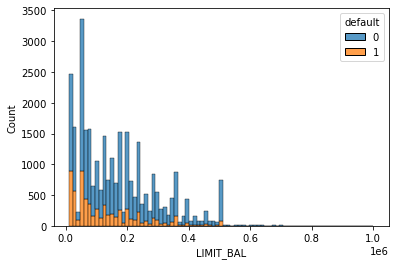

In [26]:
sns.histplot(data=data, x='LIMIT_BAL', hue='default', multiple="stack");

## Bootstrap - Интервальная оценка
H0: медианные значения равны

H1: медианные значения отличаются

In [27]:
#те, кто не вернул
negative = data[data.default == 1].LIMIT_BAL.values

#те, кто вернул
positive = data[data.default == 0].LIMIT_BAL.values

In [28]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

    
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [29]:
return_limit_bal_median_scores = list(map(np.median, get_bootstrap_samples(positive, 1000)))
not_return_limit_bal_median_scores = list(map(np.median, get_bootstrap_samples(negative, 1000)))

print("95% confidence interval for the return:",  stat_intervals(return_limit_bal_median_scores, 0.05))
print("95% confidence interval for the not return:",  stat_intervals(not_return_limit_bal_median_scores, 0.05))

95% confidence interval for the return: [150000. 150000.]
95% confidence interval for the not return: [80000. 90000.]


Интервальная оценка с помощью бутстрапа показала, что интервалы не пересекаются - значит медианы размера кредитного лимита у этих двух выборок статистически отличаются. Отвергаем нулевую гипотезу.

## U-критерий Манна-Уитни

Удостоверимся в том, что этот критерий тут уместен:

1. Проверяем данные на гомогенность:

In [30]:
stats.levene(negative, positive)

LeveneResult(statistic=240.91648444330085, pvalue=4.032352757703864e-54)

2. Shapiro-Wilk test for normality (The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05)

In [31]:
stats.shapiro(positive)

/Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9197262525558472, pvalue=0.0)

In [32]:
stats.shapiro(negative)

ShapiroResult(statistic=0.8549829721450806, pvalue=0.0)

3. Таким образом, не имея гомогенности и нормальности в данных - наш лучший выбор - это U критерий Манна-Уитни


4. Проверим гипотезу о принадлежности сравниваемых независимых выборок к одной и той же генеральной совокупности

H0: данные из одной генеральной совокупности (средние равны)

H1: не равны

In [33]:
stats.mannwhitneyu(positive, negative)

MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)

5. Отвергаем нулевую гипотезу из-за малого значения p-value

# Задание 2
Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

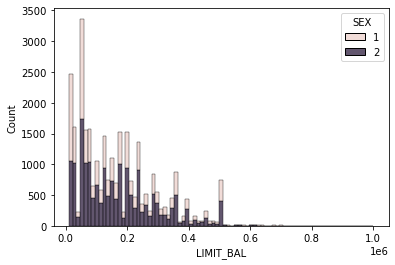

In [34]:
sns.histplot(data=data, x='LIMIT_BAL', hue='SEX', multiple="stack")

<AxesSubplot:xlabel='default', ylabel='Count'>

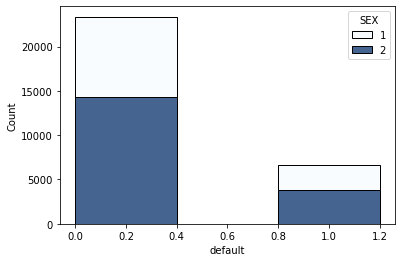

In [35]:
sns.histplot(data=data, x='default', hue='SEX', binwidth=0.4, palette='Blues', multiple="stack")

In [36]:
male = (data.SEX == 1)
female = (data.SEX == 2)
negative = (data.default == 1)
positive = (data.default == 0)


In [37]:
male_negative = data[male & negative].LIMIT_BAL
male_positive = data[male & positive].LIMIT_BAL

In [38]:
female_negative = data[female & negative].LIMIT_BAL
female_positive = data[female & positive].LIMIT_BAL

In [39]:
sex_dict = {'male_negative': male_negative, 'female_negative': female_negative, 'male_positive': male_positive, 'female_positive': female_positive}

In [40]:
combinations = list(itertools.combinations(['male_negative', 'female_negative', 'male_positive', 'female_positive'], 2))

In [41]:
p_values = []

In [42]:
for combination in combinations:
    first = sex_dict[combination[0]]
    second = sex_dict[combination[1]]
    p_value = stats.ttest_ind(first, second).pvalue
    p_values.append(p_value)

In [43]:
comparisons = ['_vs_'.join(i) for i in combinations]

In [44]:
p_values

[0.009317336598633413,
 1.4713389728376153e-65,
 2.904503342922025e-97,
 5.152717718363808e-60,
 5.1723877515768356e-92,
 0.01715272364165907]

In [45]:
comparison = pd.DataFrame({'comparison': comparisons,'p_value': p_values})
comparison

,comparison,p_value
0,male_negative_vs_female_negative,9.317337e-03
1,male_negative_vs_male_positive,1.471339e-65
2,male_negative_vs_female_positive,2.904503e-97
3,female_negative_vs_male_positive,5.152718e-60
4,female_negative_vs_female_positive,5.172388e-92
5,male_positive_vs_female_positive,1.715272e-02


In [46]:
comparison['differs_significantly'] = (comparison.p_value < 0.05)

In [47]:
comparison

,comparison,p_value,differs_significantly
0,male_negative_vs_female_negative,9.317337e-03,True
1,male_negative_vs_male_positive,1.471339e-65,True
2,male_negative_vs_female_positive,2.904503e-97,True
3,female_negative_vs_male_positive,5.152718e-60,True
4,female_negative_vs_female_positive,5.172388e-92,True
5,male_positive_vs_female_positive,1.715272e-02,True


Как видно, все группы статистически различаются между собой

То же можно подтвердить с помощью ANOVA теста:

In [48]:
pg.anova(data=data, dv='LIMIT_BAL', between=['SEX', 'default'])

,Source,SS,DF,MS,F,p-unc,np2
0,SEX,1.753809e+11,1.0,1.753809e+11,10.672442,1.088655e-03,0.000356
1,default,1.176831e+13,1.0,1.176831e+13,716.136338,6.298241e-156,0.023318
2,SEX * default,1.301494e+10,1.0,1.301494e+10,0.791997,3.735041e-01,0.000026
3,Residual,4.929260e+14,29996.0,1.643306e+10,NaN,NaN,NaN


Таким образом, существуют статистически значимые различия в разных гендерных группах.

# Задание 3
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг ? наоборт, не отдаст долг ?


<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

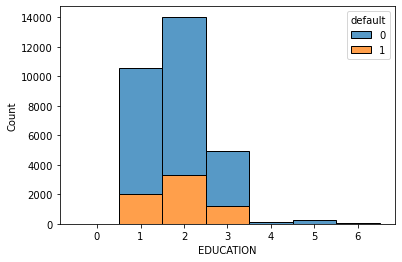

In [49]:
sns.histplot(data=data, hue='default', x='EDUCATION', binwidth=0.6, discrete=True, multiple="stack")

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

In [50]:
data.groupby('EDUCATION').agg({'default': 'value_counts'})

default
EDUCATION default         
0         0             14
1         0           8549
          1           2036
2         0          10700
          1           3330
3         0           3680
          1           1237
4         0            116
          1              7
5         0            262
          1             18
6         0             43
          1              8

In [51]:
edu_data = data.groupby('EDUCATION').agg({'default': 'mean'})
edu_data

,default
EDUCATION,
0,0.000000
1,0.192348
2,0.237349
3,0.251576
4,0.056911
5,0.064286
6,0.156863


H0 - доли равны

H1 - не равны

<AxesSubplot:xlabel='EDUCATION'>

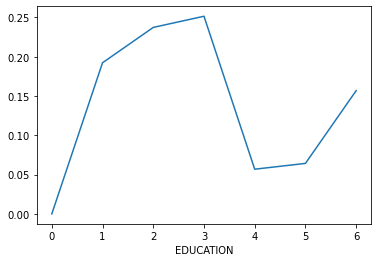

In [52]:
edu_data.default.plot()

Как видно по графику и таблицам, образование влияет на вероятность отдать долг.

In [53]:
expected = data.groupby('EDUCATION', as_index=False).agg({'default': 'count'}).default * data.default.mean()
expected

0       3.0968
1    2341.4020
2    3103.4360
3    1087.6404
4      27.2076
5      61.9360
6      11.2812
Name: default, dtype: float64

In [54]:
contingency_table = data.groupby('EDUCATION', as_index=False).agg({'default': 'sum'})
contingency_table.rename(columns={'default': 'observed'}, inplace=True)
contingency_table['expected'] = expected

In [55]:
contingency_table

,EDUCATION,observed,expected
0,0,0,3.0968
1,1,2036,2341.4020
2,2,3330,3103.4360
3,3,1237,1087.6404
4,4,7,27.2076
5,5,18,61.9360
6,6,8,11.2812


In [56]:
stats.chisquare(contingency_table.observed, contingency_table.expected, ddof=1)

Power_divergenceResult(statistic=127.11305526913317, pvalue=9.75132616866625e-26)

Результат имеет практическую значимость для выдачи кредита, чем качественнее образование (прим. - доктор наук - наилучшее), тем с большей вероятностью человек отдаст кредит.

# Задание 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

<AxesSubplot:xlabel='MARRIAGE', ylabel='Count'>

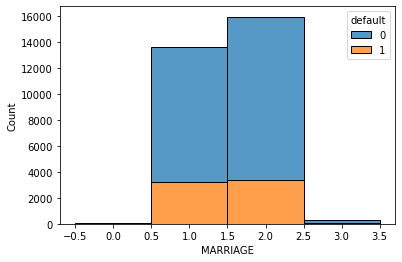

In [57]:
sns.histplot(data=data, hue='default', x='MARRIAGE', binwidth=0.6, discrete=True, multiple="stack")

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 

In [58]:
pd.pivot_table(data=data, columns='MARRIAGE', values='default', aggfunc='count', observed=True)

MARRIAGE,0,1,2,3
default,54,13659,15964,323


In [59]:
marriage = data.groupby('default').agg({'MARRIAGE': 'value_counts'})
marriage

MARRIAGE
default MARRIAGE          
0       2            12623
        1            10453
        3              239
        0               49
1       2             3341
        1             3206
        3               84
        0                5

In [60]:
table = marriage.MARRIAGE.to_numpy().reshape([2, 4]).transpose()
table

array([[12623,  3341],
       [10453,  3206],
       [  239,    84],
       [   49,     5]])

Применим Cramer's V.

In [61]:
stats.contingency.association(table)

0.034478203662766466

Коэффициент получился близким к нулю, значит связь отсутсвует. Практическая значимость в том, что этот признак можно не учитывать.

# Задание 5
Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:   
a)  о равенстве медианных значений возрастов людей   
b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения ?

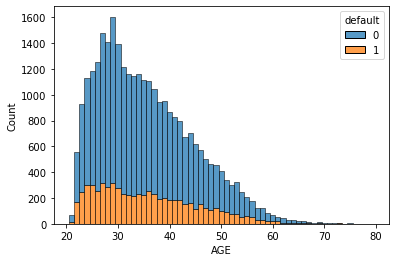

In [62]:
sns.histplot(data=data, x='AGE', hue='default', discrete=True, multiple="stack");

По графику можно сказать, что молодые люди склонны к тому, чтобы не возвращать кредиты.

## Bootstrap - интервальная оценка

Проверим равенство медианных значений:

In [63]:
return_age_median_scores = list(map(np.median, get_bootstrap_samples(ok_age, 10000)))
not_return_age_median_scores = list(map(np.median, get_bootstrap_samples(default_age, 10000)))

print("95% confidence interval for the return:",  stat_intervals(return_age_median_scores, 0.05))
print("95% confidence interval for the not return:",  stat_intervals(not_return_age_median_scores, 0.05))

95% confidence interval for the return: [34. 34.]
95% confidence interval for the not return: [34. 35.]


Интервалы, найденные с помощью бутстрепа, пересекаются - нельзя сказать, что средние отличаются.

## U-критерий Манна-Уитни

In [64]:
default_age = data[data.default == 1].AGE.values
ok_age = data[data.default == 0].AGE.values

In [65]:
np.median(default_age)

34.0

In [66]:
np.median(ok_age)

34.0

Проверим данные на нормальность и гомогенность:

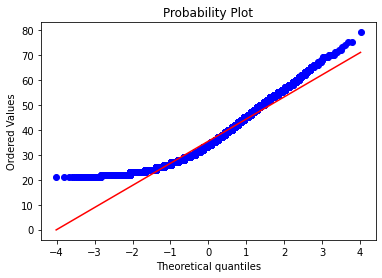

In [67]:
stats.probplot(ok_age, dist="norm", plot=pylab);

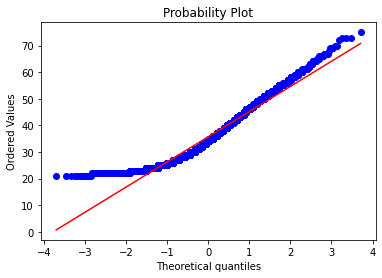

In [68]:
stats.probplot(default_age, dist="norm", plot=pylab);

Тяжёлые хвосты, но центр располагается "плотно".

H0 - выборки взяты из одной генеральной совокупности

H1 - из разных (выборки отличаются)

In [69]:
stats.mannwhitneyu(ok_age, default_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.3725035434898616)

При таком значении p-value нулевую гипотезу отвергнуть нельзя, эти данные не стоит использовать при решение о выдаче кредита.

О практической значимости говорить трудно - это вопрос банка, точнее, насколько тот склонен к риску. Можно сделать такой порог выдачи, что никто денег не получит, но при этом будут минимальные риски.